# Social Network Analysis

필요 지식: 
- file:///Users/kangthink/Downloads/6.99A.SNA.pdf
- networkx 라이브러리 사용법 (https://www.datacamp.com/community/tutorials/social-network-analysis-python)

스킬:
- 그래프화 시킬 데이터를 판단


In [57]:
import matplotlib as plt
%matplotlib inline

## Symmetric Networks

In [11]:
import networkx as nx
G_symmetric = nx.Graph()
G_symmetric.add_edge('Amitabh Bachchan','Abhishek Bachchan')
G_symmetric.add_edge('Amitabh Bachchan','Aamir Khan')
G_symmetric.add_edge('Amitabh Bachchan','Akshay Kumar')
G_symmetric.add_edge('Amitabh Bachchan','Dev Anand')
G_symmetric.add_edge('Abhishek Bachchan','Aamir Khan')
G_symmetric.add_edge('Abhishek Bachchan','Akshay Kumar')
G_symmetric.add_edge('Abhishek Bachchan','Dev Anand')
G_symmetric.add_edge('Dev Anand','Aamir Khan')

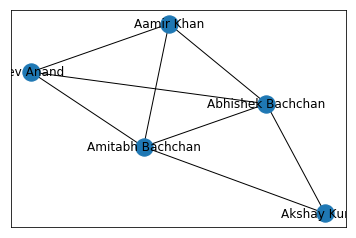

In [12]:
 nx.draw_networkx(G_symmetric)

## Asymmetric Networks

In [14]:
G_asymmetric = nx.DiGraph()
G_asymmetric.add_edge('A','B')
G_asymmetric.add_edge('A','D')
G_asymmetric.add_edge('C','A')
G_asymmetric.add_edge('D','E')

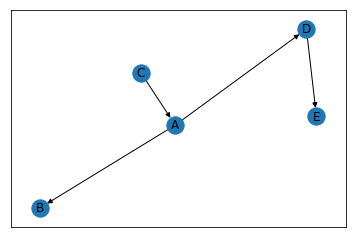

In [16]:
nx.draw_networkx(G_asymmetric)

In [17]:
nx.spring_layout(G_asymmetric)


{'A': array([ 0.13621662, -0.01933359]),
 'B': array([ 1.       , -0.1362804]),
 'D': array([-0.72583928,  0.05011216]),
 'C': array([ 0.2451332, -0.2631966]),
 'E': array([-0.65551054,  0.36869844])}

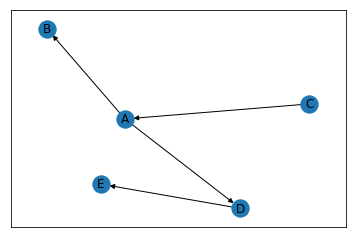

In [18]:
nx.draw_networkx(G_asymmetric)

## Weighted Networks

In [19]:
G_weighted = nx.Graph()
G_weighted.add_edge('Amitabh Bachchan','Abhishek Bachchan', weight=25)
G_weighted.add_edge('Amitabh Bachchan','Aaamir Khan', weight=8)
G_weighted.add_edge('Amitabh Bachchan','Akshay Kumar', weight=11)
G_weighted.add_edge('Amitabh Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Abhishek Bachchan','Aaamir Khan', weight=4)
G_weighted.add_edge('Abhishek Bachchan','Akshay Kumar',weight=7)
G_weighted.add_edge('Abhishek Bachchan','Dev Anand', weight=1)
G_weighted.add_edge('Dev Anand','Aaamir Khan',weight=1)

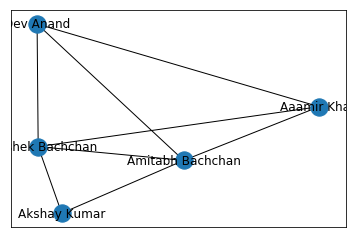

In [20]:
 nx.draw_networkx(G_weighted)

## Multigraph

In [23]:
G = nx.MultiGraph()
G.add_edge('A','B',relation ='neighbor')
G.add_edge('A','B',relation='friend')
G.add_edge('B','C', relation='neighbor')
G.add_edge('D','C',relation='friend')

0

In [24]:
G.edges()

MultiEdgeDataView([('A', 'B'), ('A', 'B'), ('B', 'C'), ('C', 'D')])

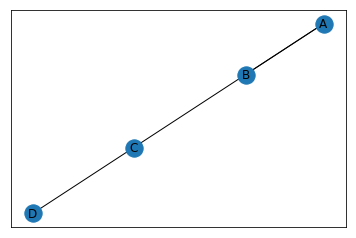

In [26]:
nx.draw_networkx(G)

## Degree


In [28]:
nx.degree(G_symmetric, 'Dev Anand')

3

## Clustering Coefficient
각 부분이 연결되어 있을 확률

In [34]:
nx.clustering(G_symmetric, 'Dev Anand')

1.0

In [35]:
nx.clustering(G_symmetric, 'Amitabh Bachchan')

0.6666666666666666

In [36]:
nx.clustering(G_symmetric, 'Akshay Kumar')

1.0

In [37]:
nx.average_clustering(G_symmetric)

0.8666666666666666

## Distance

In [38]:
nx.shortest_path(G_symmetric, 'Dev Anand', 'Akshay Kumar')

['Dev Anand', 'Amitabh Bachchan', 'Akshay Kumar']

## Breadth-first search algorithm

In [39]:
T = nx.bfs_tree(G_symmetric, 'Dev Anand')

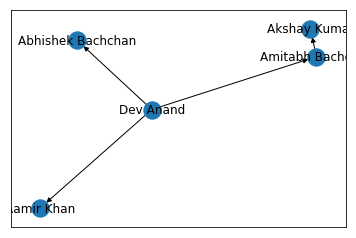

In [42]:
nx.draw_networkx(T)

## Eccentricity

In [45]:
nx.eccentricity(G_symmetric)

{'Amitabh Bachchan': 1,
 'Abhishek Bachchan': 1,
 'Aamir Khan': 2,
 'Akshay Kumar': 2,
 'Dev Anand': 2}

## Degree Centrality

In [46]:
nx.degree_centrality(G_symmetric)

{'Amitabh Bachchan': 1.0,
 'Abhishek Bachchan': 1.0,
 'Aamir Khan': 0.75,
 'Akshay Kumar': 0.5,
 'Dev Anand': 0.75}

## Eigenvector Centrality
내 친척이 누구야!

In [47]:
nx.eigenvector_centrality(G_symmetric)

{'Amitabh Bachchan': 0.5100364187624349,
 'Abhishek Bachchan': 0.5100364187624349,
 'Aamir Khan': 0.43904190094642953,
 'Akshay Kumar': 0.3069366734339046,
 'Dev Anand': 0.43904190094642953}

## Betrweenness Centrality
내가 모든 물류의 중심

In [48]:
nx.betweenness_centrality(G_symmetric)

{'Amitabh Bachchan': 0.16666666666666666,
 'Abhishek Bachchan': 0.16666666666666666,
 'Aamir Khan': 0.0,
 'Akshay Kumar': 0.0,
 'Dev Anand': 0.0}

# Facebook data

In [50]:
G_fb = nx.read_edgelist("../../data/facebook_combined.txt", create_using = nx.Graph(), nodetype=int)

In [51]:
nx.info(G_fb)

'Name: \nType: Graph\nNumber of nodes: 4039\nNumber of edges: 88234\nAverage degree:  43.6910'

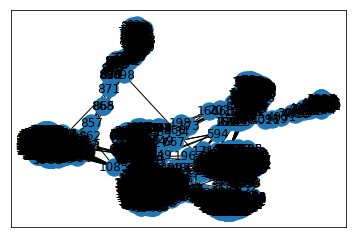

In [54]:
 nx.draw_networkx(G_fb)

In [59]:
pos = nx.spring_layout(G_fb)


In [60]:
betCent = nx.betweenness_centrality(G_fb, normalized=True, endpoints=True)

In [62]:
sorted(betCent, key=betCent.get, reverse=True)[:5]

[107, 1684, 3437, 1912, 1085]